In [1]:
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline 
plt.rcParams['figure.figsize'] = [16, 3]

import sys
sys.path.append('/Users/kai/src/psc/python')
import psc

In [2]:
ds = xr.open_dataset("/Users/kai/src/psc/build-mac/pfd.000000100.bp", engine='pscadios2')
#ds

In [3]:
ds.jx_ec

reading  jeh (slice(None, None, None), slice(None, None, None), slice(None, None, None), 0)


<xarray.DataArray 'jx_ec' (x: 1, y: 80, z: 240)>
array([[[ 0.000000e+00,  0.000000e+00, ...,  3.687026e-05,  0.000000e+00],
        [-6.340064e-05, -4.785468e-05, ...,  0.000000e+00,  0.000000e+00],
        ...,
        [-8.375298e-06,  1.769851e-05, ..., -3.664266e-05, -1.696242e-05],
        [-3.613592e-05, -1.329397e-06, ..., -6.504738e-05, -5.926569e-05]]],
      dtype=float32)
Coordinates:
  * x        (x) float64 0.0
  * y        (y) float64 0.0 1.0 2.0 3.0 4.0 5.0 ... 75.0 76.0 77.0 78.0 79.0
  * z        (z) float64 0.0 1.0 2.0 3.0 4.0 ... 235.0 236.0 237.0 238.0 239.0

reading  jeh (0, slice(None, None, None), slice(100, 151, 1), 1)


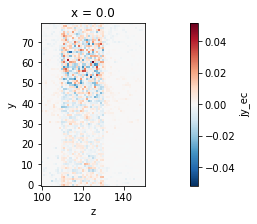

In [4]:
ds.jy_ec.sel(z=slice(100, 150)).plot()
plt.gca().set_aspect('equal')

In [5]:
ds = xr.open_dataset("/Users/kai/src/psc/build-mac/pfd_moments.000000100.bp", engine='pscadios2')

In [6]:
uy_e = ds.py_e[:,:,10:20]

In [7]:
print(type(ds.rho_e))
n_e = -ds.rho_e
print(type(n_e), type(ds.rho_e))

<class 'xarray.core.dataarray.DataArray'>
reading  all_1st (slice(None, None, None), slice(None, None, None), slice(None, None, None), 13)
<class 'xarray.core.dataarray.DataArray'> <class 'xarray.core.dataarray.DataArray'>


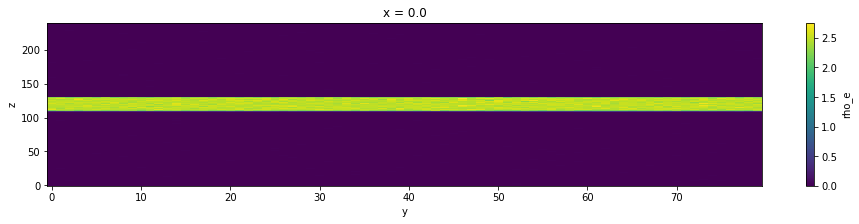

In [8]:
n_e.T.plot();

In [9]:
import expectexception
import numpy as np
import xarray as xr

In [10]:
from dask.distributed import Client, LocalCluster
cluster = LocalCluster(threads_per_worker=1)
client = Client()

client

/Users/kai/Library/Python/3.7/lib/python/site-packages/distributed/node.py:164: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 55091 instead
  expected, actual


Connection method: Cluster object,Cluster type: LocalCluster
Dashboard: http://127.0.0.1:55091/status,
Status: running,Using processes: True
Dashboard: http://127.0.0.1:55091/status,Workers: 4
Total threads: 16,Total memory: 16.00 GiB
Comm: tcp://127.0.0.1:55092,Workers: 4
Dashboard: http://127.0.0.1:55091/status,Total threads: 16
Started: Just now,Total memory: 16.00 GiB
Comm: tcp://127.0.0.1:55107,Total threads: 4
Dashboard: http://127.0.0.1:55108/status,Memory: 4.00 GiB
Nanny: tcp://127.0.0.1:55097,


In [11]:
ds = xr.open_dataset("/Users/kai/src/psc/build-mac/pfd_moments.000000000.bp", chunks=80, engine='pscadios2')

In [12]:
ds

<xarray.Dataset>
Dimensions:   (x: 1, y: 80, z: 240)
Coordinates:
  * x         (x) float64 0.0
  * y         (y) float64 0.0 1.0 2.0 3.0 4.0 5.0 ... 75.0 76.0 77.0 78.0 79.0
  * z         (z) float64 0.0 1.0 2.0 3.0 4.0 ... 235.0 236.0 237.0 238.0 239.0
Data variables: (12/39)
    rho_he_e  (x, y, z) float32 dask.array<chunksize=(1, 80, 80), meta=np.ndarray>
    jx_he_e   (x, y, z) float32 dask.array<chunksize=(1, 80, 80), meta=np.ndarray>
    jy_he_e   (x, y, z) float32 dask.array<chunksize=(1, 80, 80), meta=np.ndarray>
    jz_he_e   (x, y, z) float32 dask.array<chunksize=(1, 80, 80), meta=np.ndarray>
    px_he_e   (x, y, z) float32 dask.array<chunksize=(1, 80, 80), meta=np.ndarray>
    py_he_e   (x, y, z) float32 dask.array<chunksize=(1, 80, 80), meta=np.ndarray>
    ...        ...
    txx_i     (x, y, z) float32 dask.array<chunksize=(1, 80, 80), meta=np.ndarray>
    tyy_i     (x, y, z) float32 dask.array<chunksize=(1, 80, 80), meta=np.ndarray>
    tzz_i     (x, y, z) float32 dask.array<chunksize=(1, 80, 80), meta=np.ndarray>
    txy_i     (x, y, z) float32 dask.array<chunksize=(1, 80, 80), meta=np.ndarray>
    tyz_i     (x, y, z) float32 dask.array<chunksize=(1, 80, 80), meta=np.ndarray>
    tzx_i     (x, y, z) float32 dask.array<chunksize=(1, 80, 80), meta=np.ndarray>

In [13]:
ds['n_e'] = -ds.rho_e

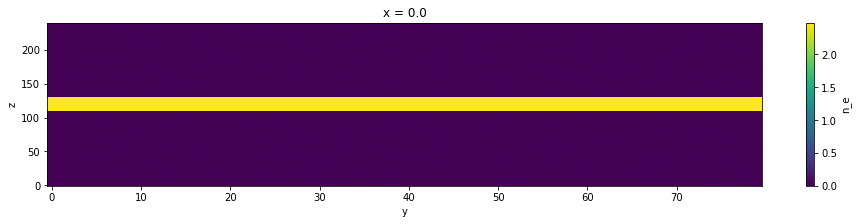

In [14]:
ds.n_e.T.plot();